In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Data Manipulation
Before uploading the file I have:
*   Removed the extra text(Read more \n Read less)
*   Removed all the new line.
*   Made the date of same format.



In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Deadshot-07/Sentiment-Analysis/T/ReviewData.csv')
data.head()

,Review,date,Location
0,I was very impressed with the resort. Great st...,20/8/19,Sebastian
1,The rooms were nice the outside needs work als...,20/8/19,Los Angeles
2,Great location! I have stayed at this hotel on...,20/8/19,Georgia
3,The hotel was adequate for my stay. The strips...,20/8/19,NaN
4,"Great location, room was large and spacious. P...",19/8/19,Palm Harbor


In [ ]:
data.shape

(6448, 3)

In [ ]:
print(data['Location'].isna().sum())

4737


In [ ]:
print(data['date'].isna().sum())

0


In [ ]:
# data[['Day','','Month-Year']] = data['date'].str.partition('/', expand=True)
# del data['Day'], data['']
# data.head()

# Analyzing the Dataset

In [ ]:
data[['Day','Month','Year']] = data['date'].str.split('/', expand=True)
data.head()

,Review,date,Location,Day,Month,Year
0,I was very impressed with the resort. Great st...,20/8/19,Sebastian,20,8,19
1,The rooms were nice the outside needs work als...,20/8/19,Los Angeles,20,8,19
2,Great location! I have stayed at this hotel on...,20/8/19,Georgia,20,8,19
3,The hotel was adequate for my stay. The strips...,20/8/19,NaN,20,8,19
4,"Great location, room was large and spacious. P...",19/8/19,Palm Harbor,19,8,19


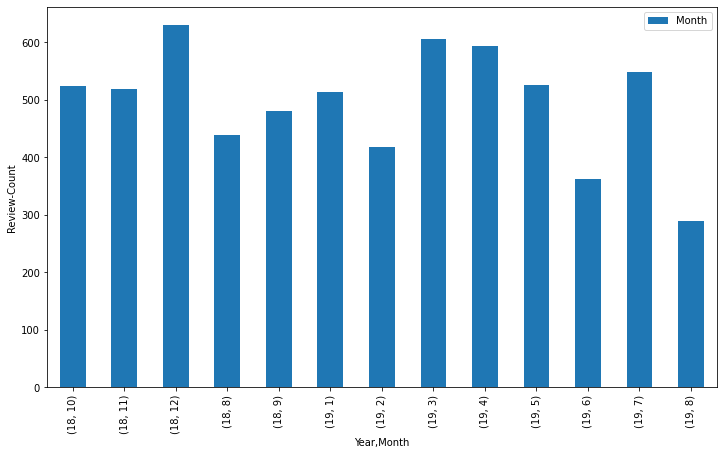

In [ ]:
data.groupby(['Year','Month'])['Month'].count().plot(kind='bar',legend=True,ylabel='Review-Count', figsize=(12,7))

In [ ]:
del data['Day'],data['Month'],data['Year']

From the graph, we can clearly see the most reviews are given in month of Dec'18 and the least number of reviews are given in July'19.

In [ ]:
data.groupby(['Location'],sort=False)['Location'].count().sort_values()

Location
Sebastian                     1
jacksonville, Fl              1
Tampa, Fl                     1
miami, us                     1
Whitley Bay, gb               1
                           ... 
Canada                       16
California                   19
San Jose                     19
New York                     34
United States of America    116
Name: Location, Length: 1082, dtype: int64

In [ ]:
city = ['NY','New York']
count = 0
for loc in data['Location']:
  loc = str(loc)
  for i in city:
    if i in loc:
      count+=1
print('Location\n','New York',count)


Location
 New York             130


United States of America is mentioned the most. But the reviews are of U.S. hotel. So that makes New York the most mentioned city among America.

# Sentiment Analysis

In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
SIA = SentimentIntensityAnalyzer()

In [ ]:
print(SIA.polarity_scores(data['Review'][1])['pos'])

0.379


In [ ]:
neg, neu, pos, compound = [],[],[],[]
for i in data['Review']:
  r = str(i)
  neg.append(SIA.polarity_scores(r)['neg'])
  neu.append(SIA.polarity_scores(r)['neu'])
  pos.append(SIA.polarity_scores(r)['pos'])
  compound.append(SIA.polarity_scores(r)['compound'])

data['Neg'] = neg
data['Neu'] = neu
data['Pos'] = pos
data['Compound'] = compound


In [ ]:
data.head()

,Review,date,Location,Neg,Neu,Pos,Compound
0,I was very impressed with the resort. Great st...,20/8/19,Sebastian,0.000,0.607,0.393,0.9421
1,The rooms were nice the outside needs work als...,20/8/19,Los Angeles,0.075,0.546,0.379,0.8360
2,Great location! I have stayed at this hotel on...,20/8/19,Georgia,0.000,0.761,0.239,0.6588
3,The hotel was adequate for my stay. The strips...,20/8/19,NaN,0.077,0.817,0.107,0.3634
4,"Great location, room was large and spacious. P...",19/8/19,Palm Harbor,0.000,0.471,0.529,0.9260


In [ ]:
pos_review = [ j for i, j in enumerate(data['Review']) if data['Compound'][i] > 0.2]
neu_review = [ j for i, j in enumerate(data['Review']) if 0.2 >= data ['Compound'][i] >= -0.2]
neg_review = [ j for i, j in enumerate(data['Review']) if data ['Compound'][i] < -0.2]

In [ ]:
pos_rev_per = len(pos_review)*100/len(data['Review'])
neu_rev_per = len(neu_review)*100/len(data['Review'])
neg_rev_per = len(neg_review)*100/len(data['Review'])


print("Percentage of positive review: {:.3f}%".format(pos_rev_per))
print("Percentage of neutral review : {:.3f}%".format(neu_rev_per))
print("Percentage de negative review: {:.3f}%".format(neg_rev_per))

Percentage of positive review: 66.098%
Percentage of neutral review : 16.904%
Percentage de negative review: 16.998%


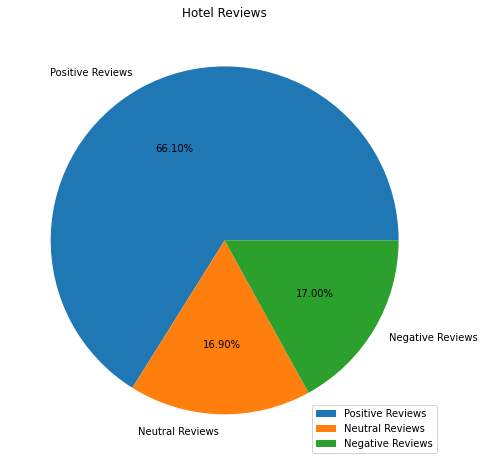

In [ ]:
# Creating dataset
chart = ['Positive Reviews','Neutral Reviews','Negative Reviews']
  
percentage = [pos_rev_per,neu_rev_per,neg_rev_per]

# Creating plot
fig = plt.figure(figsize =(10, 8))
plt.pie(percentage, labels = chart,autopct='%.2f%%')
plt.title('Hotel Reviews')
plt.legend(chart)
  
# show plot
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

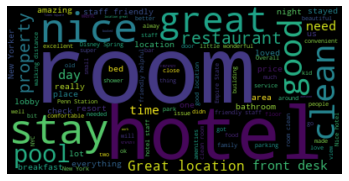

4262


In [ ]:
text = str(pos_review)

wordcloud = WordCloud(max_words =100).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print(len(pos_review))

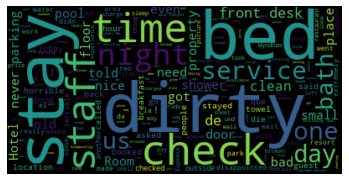

1096


In [ ]:
text = str(neg_review)#.lower()
text = text.replace('hotel','')
text = text.replace('room','')
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print(len(neg_review))